In [75]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

## Load the annotations into a `DataFrame`

In [76]:
df = pd.read_json('../annotations.json')

## Distribution of relation labels

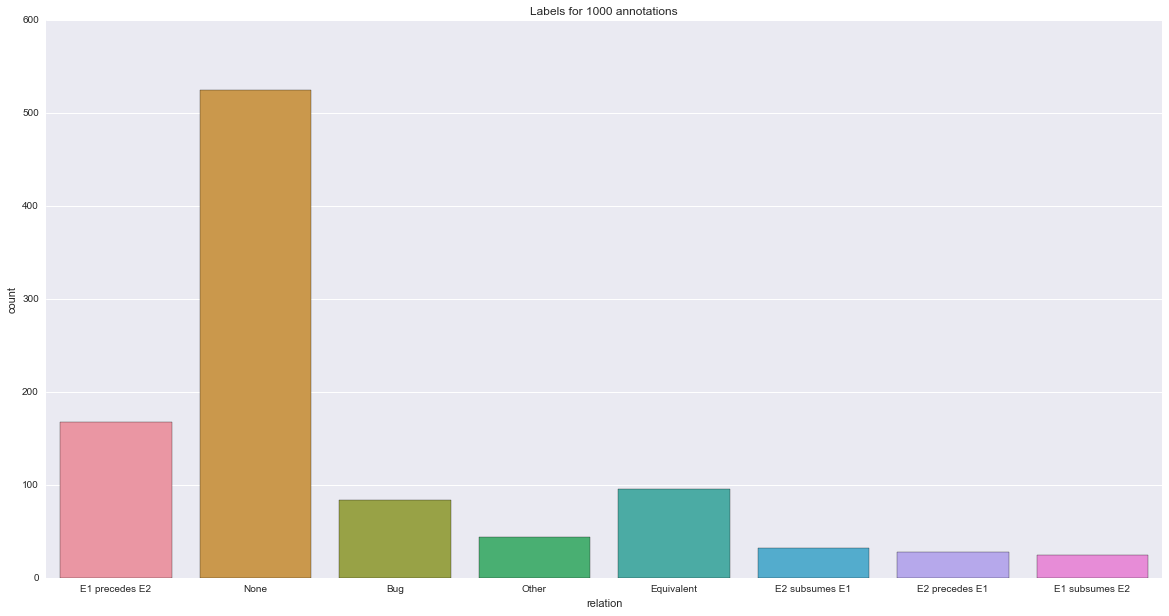

In [77]:
rel = "relation"
# only show the rows with a definitive annotation
non_empty = df[df[rel] != ""]
plt.figure(figsize=(20, 10))
sns.plt.title("Labels for {} annotations".format(len(non_empty)))
_ = sns.countplot(x="relation", data=non_empty)
#sns.plt.show()

## Distribution of relation labels (cont'd)

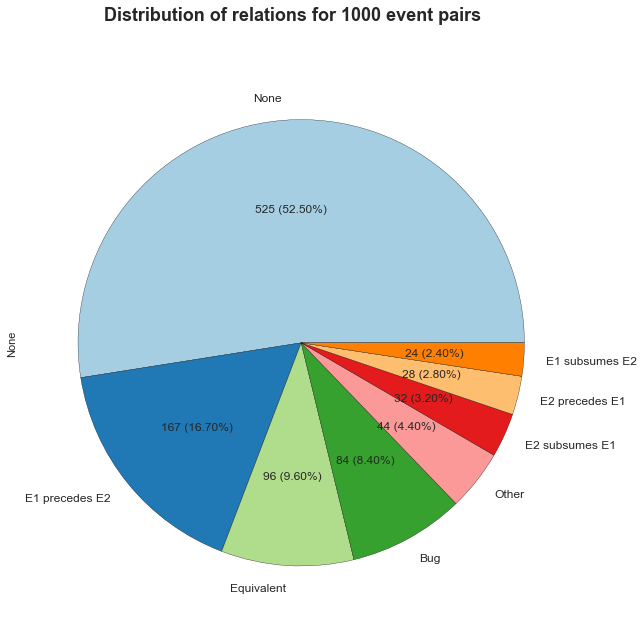

In [78]:
#relation_groups = non_empty.groupby(rel)
counts = non_empty[rel].value_counts()
lbls, cnts = list(zip(*counts.items()))
series = pd.Series(cnts, index=lbls)#, name='Relation counts')
#_ = pd.DataFrame(counts)
fig_title = "Distribution of relations for {} event pairs".format(len(non_empty))
ax = series.plot(
        kind='pie', 
        #labels=lbls, 
        fontsize=12,
        autopct=lambda p: '{:.0f} ({:.2f}%)'.format(round(p * counts.sum() / 100), p),
        colors=sns.color_palette("Paired", 8),
        #subplots=True, 
        figsize=(10, 10), 
#        title=fig_title,
)

fig = ax.get_figure()
fig.suptitle(fig_title, fontsize=18, fontweight="bold")
fig.savefig('relation-dist.png')